## Projet 2021

### Préparation du notebook


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**
Antoine Toullalan,
Rosa Mendas

## Partie 1 - Description du problème

On se positionne du côté developpeur de l'application. On souhaite déterminer la note qu'une application pourrait obtenir. A partir des données fournies, nous allons tenter de déterminer le rating d'une application. Pour ce faire, nous allons baser notre analyse sur une classification non supervisée, notamment grâce à la méthode Kmoyennes.


## Partie 2 - Modèle

On importe les données fournies dans GoogleApps puis on retire les colonnes non utilisées. 
On attribue des identifiants spécifiques à chacun des élements du Dataframe.
L'idée finale serait d'avoir une fonction qui -avec quelques critères données en entrée- nous donnerait une fourchette  contenant la notation de l'application: on se positionne dans un des cluster formés.

Afin de résoudre la problématique: 
On normalise l'ensemble des valeurs du df et on applique Kmoyennes au nouveau df normalisé.
On construit un dictionnaire contenant l'ensemble des moyennes et écarts-types de chaque colonne pour chaque affectation.
Enfin, on crée une fonction qui prend les caractéristiques de l'application en entrée, cherchera l'affectation qui lui convient le plus et retournera une notation suivie d'un écart-type.

On prend pour hypothèse : 
Retourner une note en fonction du maximum de critères partagés, dans ce cas on ne regarde pas uniquement le fichier user reviews. 


## Partie 3 - Code Transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import sys
sys.path.append('../')  
data1 = pd.read_csv("GoogleApps/googleplaystore_user_reviews.csv",encoding='utf-8')
data=data1.fillna("Empty")
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Empty,Empty,Empty,Empty
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.875
4,10 Best Foods for You,Best idea us,Positive,1,0.3


In [3]:

print(data.shape)
data.drop(data.loc[data['Sentiment']=="Empty"].index, inplace=True)
data=data.drop('Translated_Review', axis=1)
print(data.shape)
data.head()

(64295, 5)
(37432, 4)


,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.4,0.875
4,10 Best Foods for You,Positive,1,0.3
5,10 Best Foods for You,Positive,1,0.3


In [4]:
#Quelques fonctions pour rendre le df plus lisible

def categorisationS(var):
    if var == 'Positive':
        return 2
    if var == 'Negative':
        return 1
    return -1

x = min(data['Sentiment_Polarity'])
def categorisationSP(var):
    return float(var)-x+1
y = min(data['Sentiment_Subjectivity'])
def categorisationRev(var):
    return int(var)-y+1

def categorisationSS(var):
    return float(var)


In [5]:
new_S=data["Sentiment"].apply(categorisationS)
data["Sentiment"]=new_S.values

new_SP=data["Sentiment_Polarity"].apply(categorisationSP)
data["Sentiment_Polarity"]=new_SP.values

new_ss=data["Sentiment_Subjectivity"].apply(categorisationSS)
data["Sentiment_Subjectivity"]=new_ss.values

print(data.shape)
data.drop(data.loc[data['Sentiment']==-1].index, inplace=True)
print(data.shape)

(37432, 4)
(32269, 4)


In [6]:
docu1 = pd.read_csv("GoogleApps/googleplaystore.csv",encoding='utf-8')
colonnesAEliminer=["Genres","Type","Installs","Android Ver","Last Updated",'Content Rating','Category','Size','Price','Current Ver']
docu=docu1.drop(colonnesAEliminer, axis=1)
docu.drop(docu.loc[docu['Reviews']=='3.0M'].index, inplace=True)
new_rev=docu["Reviews"].apply(categorisationRev)
docu["Reviews"]=new_rev.values
docu.head()

,App,Rating,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,160.0
1,Coloring book moana,3.9,968.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87511.0
3,Sketch - Draw & Paint,4.5,215645.0
4,Pixel Draw - Number Art Coloring Book,4.3,968.0


In [7]:
l1 = np.unique(data["App"].values).tolist()
print(len(l1))
l2 = np.unique(docu["App"].values).tolist()
print(len(l2))
intersection = [x for x in l1 if x in l2]
print(len(intersection))

863
9659
814


In [8]:
df = pd.merge(data,docu)
df = df.groupby("App").mean()
df

,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating,Reviews
App,,,,,
10 Best Foods for You,1.941860,2.530943,0.558827,4.0,2491.0
11st,1.766667,2.241726,0.547498,3.8,48733.0
1800 Contacts - Lens Store,1.914286,2.363594,0.665337,4.7,23161.0
1LINE – One Line with One Touch,1.771429,2.213115,0.605085,4.6,214879.0
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,1.961538,2.553312,0.626603,4.2,115774.0
...,...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,1.650000,2.115172,0.591087,4.5,260128.0
Hotspot Shield Free VPN Proxy & Wi-Fi Security,1.850000,2.428000,0.668583,4.2,1116394.0
Hotstar,1.500000,2.043632,0.544888,4.3,4885647.0


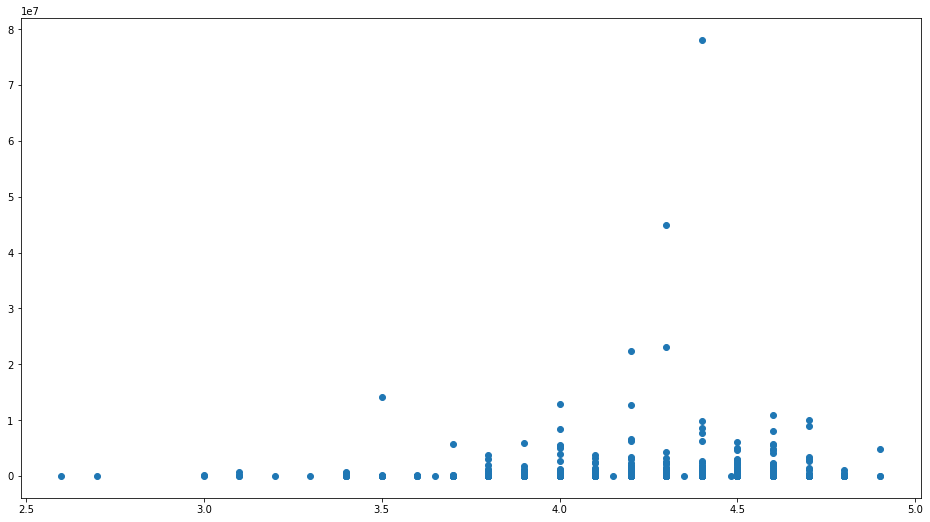

In [9]:
X = np.array(np.sort(df["Rating"]))
Y = np.array(df["Reviews"])
figure = plt.figure(figsize = (25, 25))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

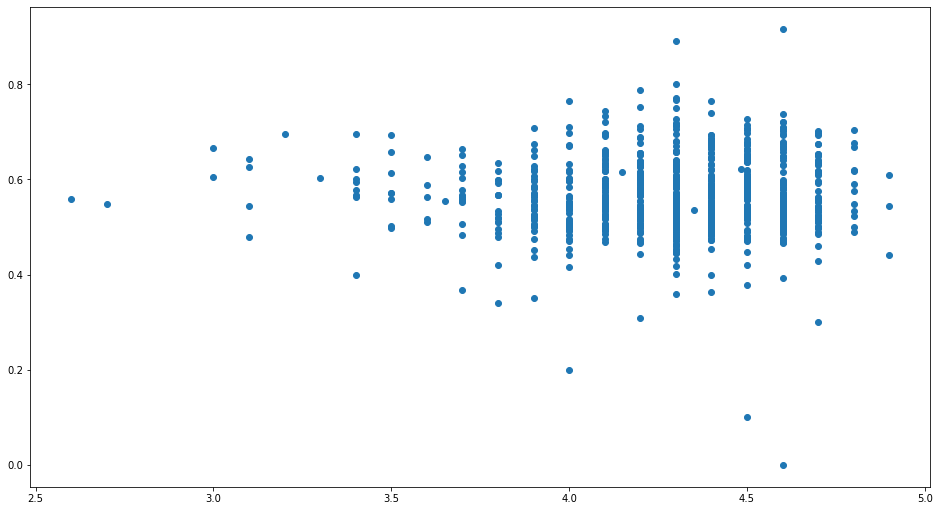

In [10]:
X = np.array(np.sort(df["Rating"]))
Y = np.array(df["Sentiment_Subjectivity"])
figure = plt.figure(figsize = (25, 25))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

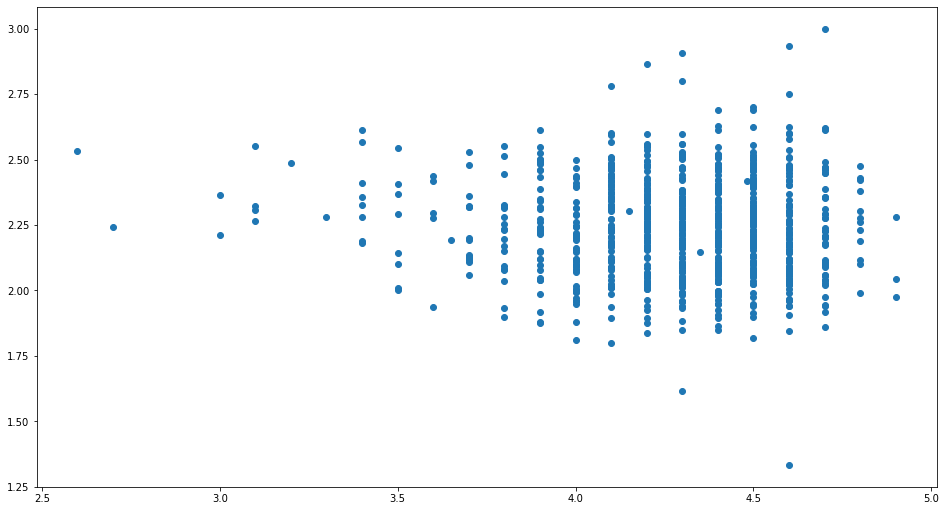

In [11]:
X = np.array(np.sort(df["Rating"]))
Y = np.array(df["Sentiment_Polarity"])
figure = plt.figure(figsize = (25, 25))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

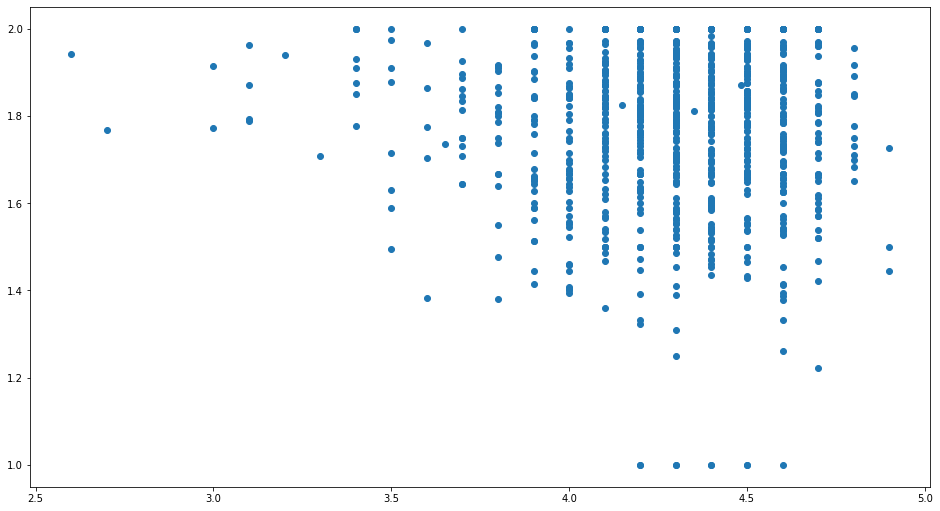

In [12]:
X = np.array(np.sort(df["Rating"]))
Y = np.array(df["Sentiment"])
figure = plt.figure(figsize = (25, 25))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

In [13]:
colonnesAEliminer=["Reviews"]
df=df.drop(colonnesAEliminer, axis=1)
df.head()

,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating
App,,,,
10 Best Foods for You,1.941860,2.530943,0.558827,4.0
11st,1.766667,2.241726,0.547498,3.8
1800 Contacts - Lens Store,1.914286,2.363594,0.665337,4.7
1LINE – One Line with One Touch,1.771429,2.213115,0.605085,4.6
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,1.961538,2.553312,0.626603,4.2


## Partie 3 - Code Problématique

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mean
%matplotlib inline

import sys
sys.path.append('../')  

import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut


In [15]:
def most_common(lst):
    #Retourne l'élement le plus présent dans la liste
    if lst == []:
        print("augmentez taille du cluster")
        return -1
    return max(set(lst), key=lst.count)

def retour_prix(df, S,SP, SS):
    #Retourne en fonction des paramètres l'indice de df contenant des valeurs proches de celles des 
    #caractéristiques recherchées
    liste = {}
    for i in range(3):
        liste[i]=[]
        
    for i in df:
        moy=df[i][0]
        ec = df[i][1]
        #si élément compris entre moyenne et écart-type
        if S <= moy[0]+ec[0] and S >= moy[0]-ec[0]:
            liste[0].append(i)
        if SP <= moy[1]+ec[1] and SP >= moy[1]-ec[1]:
            liste[1].append(i)
        if SS <= moy[2]+ec[2] and SS >= moy[2]-ec[2]:
            liste[2].append(i)
            
    L = []
    for i in range(3):
        L+=liste[i]
    return most_common(L) #on retourne le cluster ayant un max de points communs avec les param en entrée
    

## Partie 4 - Protocole expérimental

Dans cette partie, on tente de vérifier que notre code et raisonnement sont bons. Par la suite, on tente de déterminer une future note et voir sa cohérence.

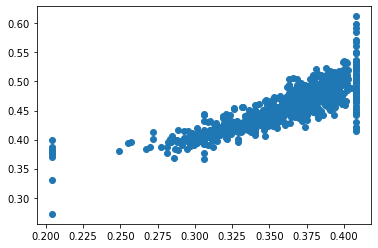

In [16]:
colonnes = df.columns
data_desc1 = np.array(df[colonnes])
data_desc1 = ut.normalisation(data_desc1)
plt.scatter(data_desc1[:,0],data_desc1[:,1])

In [17]:
listeR = np.unique(df["Rating"].values).tolist()
print(len(listeR))

190


Pour la suite du problème on fixe K à 10.
On tente de vérifier que les prix prédis sont cohérents comparés aux prix actuels des applications.

Fini


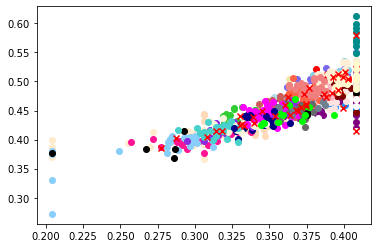

In [23]:
K=35
centres1,affectation1 = ut.kmoyennes(K, data_desc1, 0.05, 100)
ut.affiche_resultat(data_desc1,centres1,affectation1,K)


In [24]:
columns=df.columns
liste1 = {}
for c in affectation1:
    tab = (df[columns].iloc[affectation1[int(c)]]).agg(["mean", "std"])
    #Moyenne et Ecart-Type
    liste1[int(c)] = tab.values

In [25]:
###ICI ON FAIT NOTRE DEMANDE:
#Veuillez indiquer selon ce tableau, les caractéristiques de votre application
print("On teste 10 Best Foods for You, rating = 4.0")
SP = categorisationSP("0.3")
SS = categorisationSS("1.0")
S = categorisationS("Positive")

categ1 = retour_prix(liste1,S,SP,SS)
ecart = liste1[categ1][1][3]
rating = liste1[categ1][0][3]
print("\nRating de base du cluster: ",round(rating,2))
print("Avec un écart-type de: ",round(ecart,2))

On teste 10 Best Foods for You, rating = 4.0

Rating de base du cluster:  4.03
Avec un écart-type de:  0.12


In [26]:
###ICI ON FAIT NOTRE DEMANDE:
# 	1.914286 	2.363594 	0.665337 	4.7
#Veuillez indiquer selon ce tableau, les caractéristiques de votre application
print("On teste 1800 Contacts - Lens Store, rating = 4.7")
SP = categorisationSP("0.5")
SS = categorisationSS("0.6")
S = categorisationS("Positive")

categ1 = retour_prix(liste1,S,SP,SS)
ecart = liste1[categ1][1][3]
rating = liste1[categ1][0][3]
print("\nRating de base du cluster: ",round(rating,2))
print("Avec un écart-type de: ",round(ecart,2))

On teste 1800 Contacts - Lens Store, rating = 4.7

Rating de base du cluster:  4.4
Avec un écart-type de:  0.0


In [27]:
###ICI ON FAIT NOTRE DEMANDE:
#Veuillez indiquer selon ce tableau, les caractéristiques de votre application
print("On teste 11st, rating = 3.8")
SP = categorisationSP("-0.5")
SS = categorisationSS("0.15")
S = categorisationS("Negative")
categ1 = retour_prix(liste1,S,SP,SS)
ecart = liste1[categ1][1][3]
rating = liste1[categ1][0][3]
print("\nRating de base du cluster: ",round(rating,2))
print("Avec un écart-type de: ",round(ecart,2))
print("Dans ce cas il est normal d'avoir une valeur affichée plus élevée car nous avons renseigné des informations non représentative de la moyenne des catégories pour cette application.")

On teste 11st, rating = 3.8

Rating de base du cluster:  4.03
Avec un écart-type de:  0.12
Dans ce cas il est normal d'avoir une valeur affichée plus élevée car nous avons renseigné des informations non représentative de la moyenne des catégories pour cette application.


On remarque que les données sont réparties pour la plupart de manière cohérente au sein des clusters. On retrouve les rating recherchés initialement en fonction des arguments passés en paramètres.

Mais il existe tout de même un écart lorsque l'application est bien noté mais qu'un sentiment opposé à la moyenne est donné (vice versa).


## Partie 5 - Résultats

Les résultats sont rendus en fonction du sentiment, sentiment subjectif et sentiment populaire.
Les résultats sont compris entre l'ecart de base du cluster +- écart-type.


## Partie 6 - Analyse


L'algorithme Kmoyennes nous a permis de déterminer de manière rapide et simple le Rating d'une application accompagné d'une marge.
Le rating peut néanmoins être faussé par l'entrée de données non fiables: il faudrait donner en entré la moyenne des sentiments et pas uniquement un des sentiments trouvé dans le df.
De plus, les résultats pourraient être plus précis encore à l'aide d'autres données qu'on pourrait trouver: le nombre d'installations ne nous aide pas mais peut-être que d'autres critères si ? A voir ! 